# Explore here

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:

# Cargar los datos desde el enlace
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

# Mostrar primeras filas
total_data.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [25]:
# Mostrar la forma del DataFrame
total_data.shape

(48895, 16)

In [26]:
# Mostrar información del DataFrame
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [27]:
# Eliminar las columnas que no son necesarias
total_data.drop(["id", "name", "host_name", "last_review", "reviews_per_month"], axis=1, inplace=True)

In [28]:
# Eliminar duplicados innecesarios
total_data.drop_duplicates(inplace=True)

# Analisis univariado de las variables numéricas

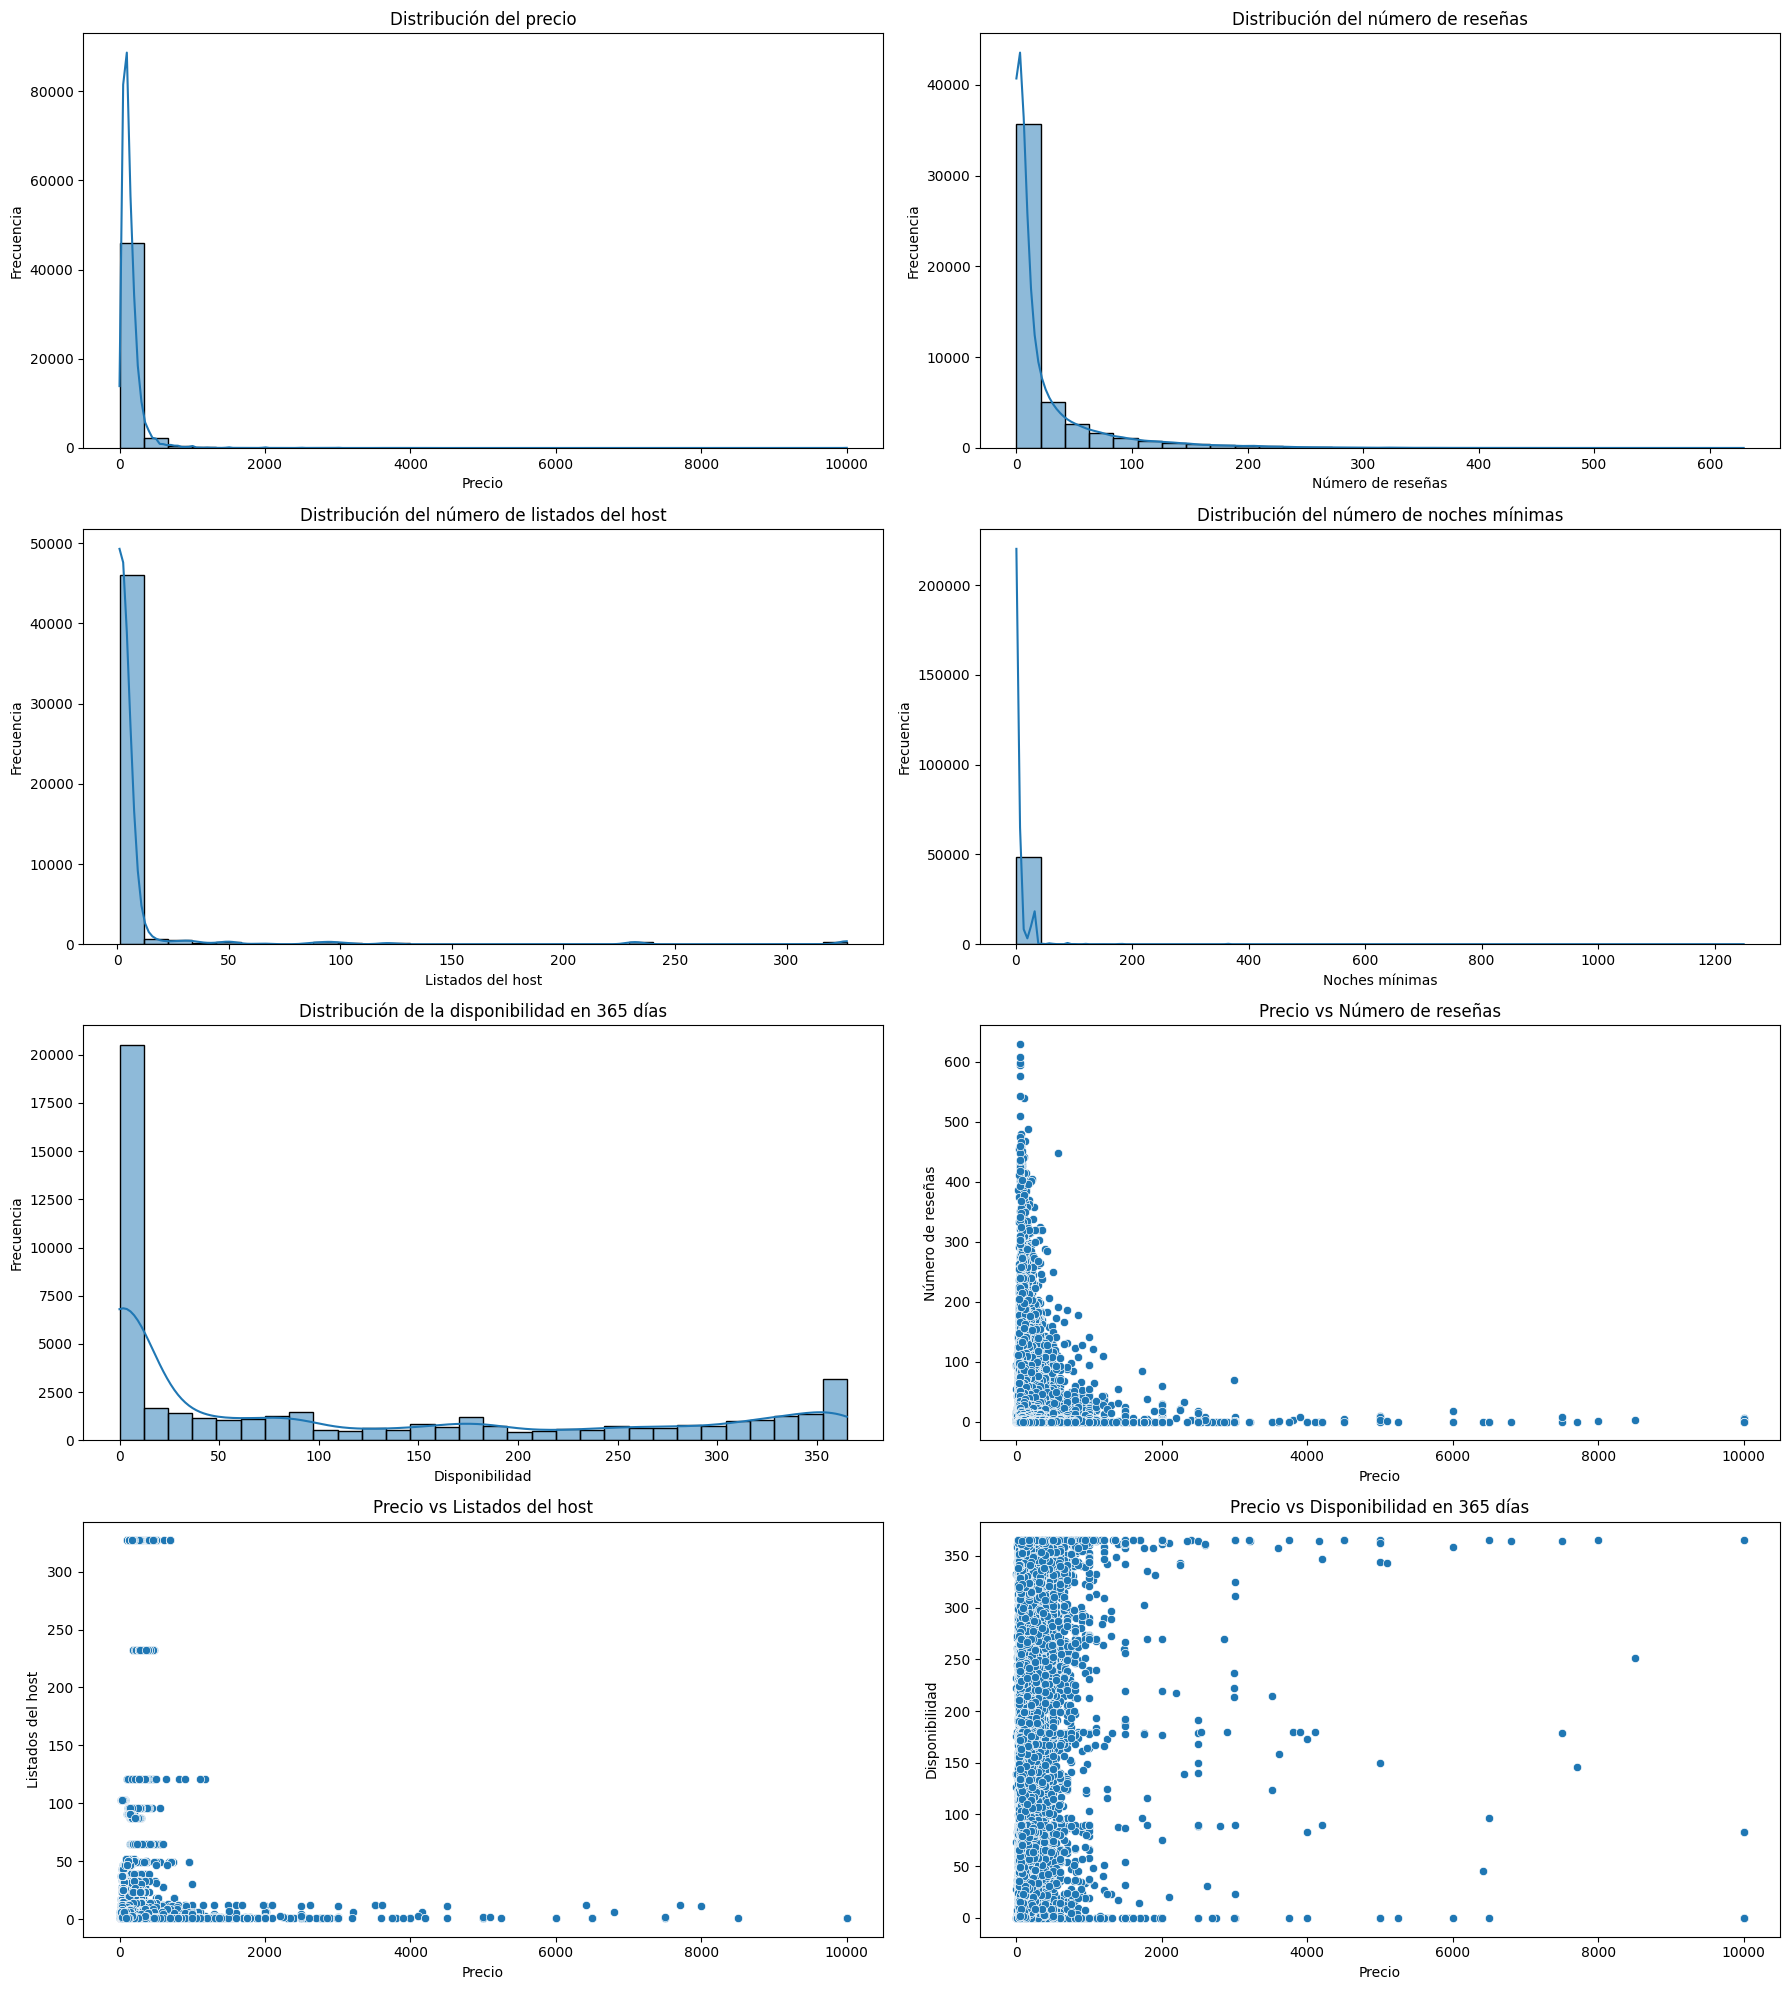

In [29]:
# Eliminar filas con valores nulos
total_data.dropna(inplace=True)
# Mostrar estadísticas descriptivas
total_data.describe()


# Creamos un subplot con 4 filas y 2 columnas
fig, axes = plt.subplots(4, 2, figsize=(18, 20))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Histograma: Distribución del precio
sns.histplot(data=total_data, x="price", bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribución del precio")
axes[0, 0].set_xlabel("Precio")
axes[0, 0].set_ylabel("Frecuencia")

# Histograma: Número de reseñas
sns.histplot(data=total_data, x="number_of_reviews", bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Distribución del número de reseñas")
axes[0, 1].set_xlabel("Número de reseñas")
axes[0, 1].set_ylabel("Frecuencia")

# Histograma: Listados del host
sns.histplot(data=total_data, x="calculated_host_listings_count", bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Distribución del número de listados del host")
axes[1, 0].set_xlabel("Listados del host")
axes[1, 0].set_ylabel("Frecuencia")

# Histograma: Noches mínimas
sns.histplot(data=total_data, x="minimum_nights", bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Distribución del número de noches mínimas")
axes[1, 1].set_xlabel("Noches mínimas")
axes[1, 1].set_ylabel("Frecuencia")

# Histograma: Disponibilidad en 365 días
sns.histplot(data=total_data, x="availability_365", bins=30, kde=True, ax=axes[2, 0])
axes[2, 0].set_title("Distribución de la disponibilidad en 365 días")
axes[2, 0].set_xlabel("Disponibilidad")
axes[2, 0].set_ylabel("Frecuencia")

# Scatter: Precio vs Número de reseñas
sns.scatterplot(data=total_data, x="price", y="number_of_reviews", ax=axes[2, 1])
axes[2, 1].set_title("Precio vs Número de reseñas")
axes[2, 1].set_xlabel("Precio")
axes[2, 1].set_ylabel("Número de reseñas")

# Scatter: Precio vs Listados del host
sns.scatterplot(data=total_data, x="price", y="calculated_host_listings_count", ax=axes[3, 0])
axes[3, 0].set_title("Precio vs Listados del host")
axes[3, 0].set_xlabel("Precio")
axes[3, 0].set_ylabel("Listados del host")

# Scatter: Precio vs Disponibilidad
sns.scatterplot(data=total_data, x="price", y="availability_365", ax=axes[3, 1])
axes[3, 1].set_title("Precio vs Disponibilidad en 365 días")
axes[3, 1].set_xlabel("Precio")
axes[3, 1].set_ylabel("Disponibilidad")

plt.tight_layout()
plt.show()

# Analisis :
- El análisis univariado numérico muestra que la mayoría de los precios están concentrados en un rango bajo, con una cola larga hacia precios más altos.
- La mayoría de los listados tienen un número moderado de reseñas, y la mayoría de los hosts tienen pocos listados.
- La mayoría de los listados requieren pocas noches mínimas y tienen una alta disponibilidad durante el año.

# Analisis univariado de las variables categoricas

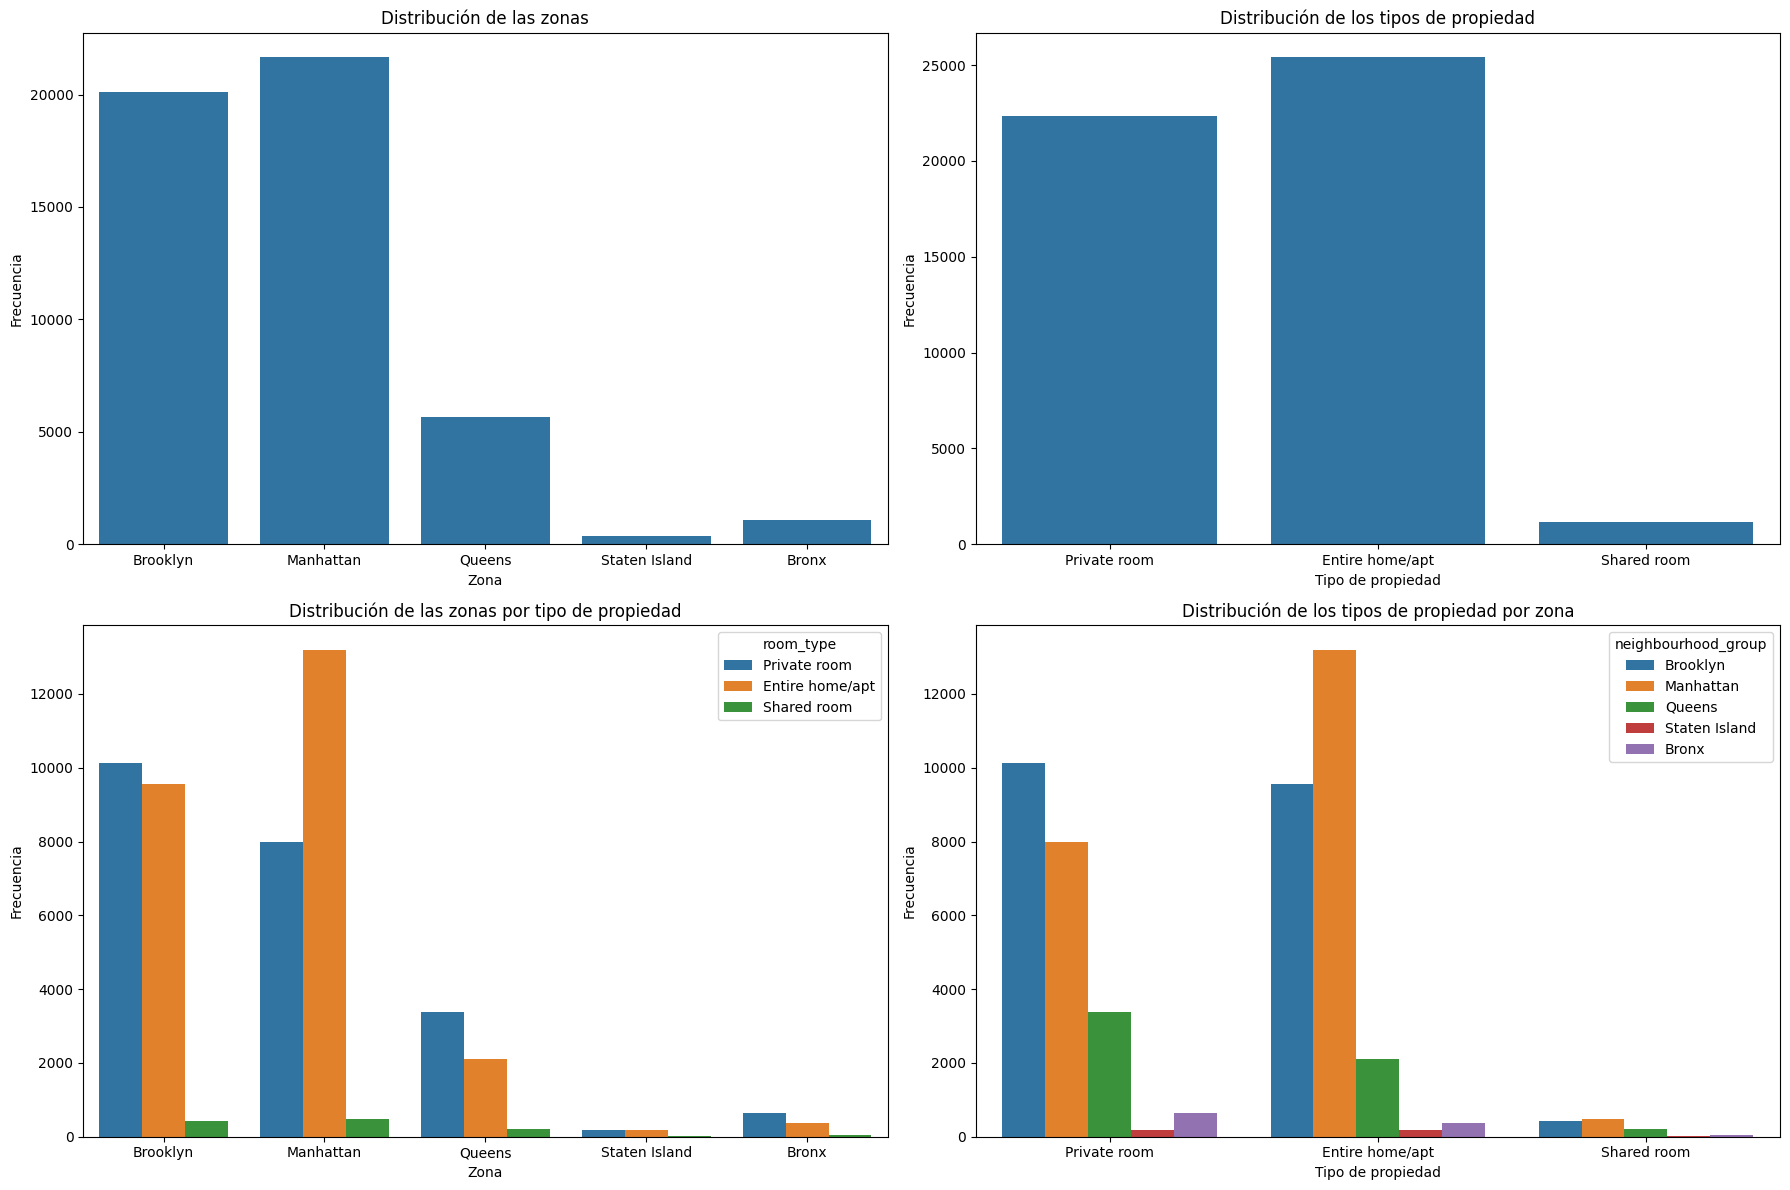

In [30]:
# Analisis univariado de las variables categóricas
# Creamos un subplot con 2 filas y 2 columnas
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
plt.subplots_adjust(hspace=0.5, wspace=0.3)
# Gráfico de barras: Distribución de las zonas
sns.countplot(data=total_data, x="neighbourhood_group", ax=axes[0, 0])
axes[0, 0].set_title("Distribución de las zonas")
axes[0, 0].set_xlabel("Zona")
axes[0, 0].set_ylabel("Frecuencia")
# Gráfico de barras: Distribución de los tipos de propiedad
sns.countplot(data=total_data, x="room_type", ax=axes[0, 1])
axes[0, 1].set_title("Distribución de los tipos de propiedad")
axes[0, 1].set_xlabel("Tipo de propiedad")
axes[0, 1].set_ylabel("Frecuencia")
# Gráfico de barras: Distribución de las zonas por tipo de propiedad
sns.countplot(data=total_data, x="neighbourhood_group", hue="room_type", ax=axes[1, 0])
axes[1, 0].set_title("Distribución de las zonas por tipo de propiedad")
axes[1, 0].set_xlabel("Zona")
axes[1, 0].set_ylabel("Frecuencia")
# Gráfico de barras: Distribución de los tipos de propiedad por zona
sns.countplot(data=total_data, x="room_type", hue="neighbourhood_group", ax=axes[1, 1])
axes[1, 1].set_title("Distribución de los tipos de propiedad por zona")
axes[1, 1].set_xlabel("Tipo de propiedad")
axes[1, 1].set_ylabel("Frecuencia")
plt.tight_layout()
plt.show()



# Analisis:
- La mayoría de los listados se encuentran en Manhattan, seguido por Brooklyn.
- La mayoría de los tipos de propiedad son "Entire home/apt" y "Private room".
- La distribución de los tipos de propiedad es bastante equilibrada entre "Entire home/apt" y "Private room", con una menor proporción de "Shared room".
- La mayoría de los listados en Manhattan son "Entire home/apt", mientras que en Brooklyn hay una mayor proporción de "Private room".
- La mayoría de los listados en Queens son "Entire home/apt", mientras que en Bronx y Staten Island hay una mayor proporción de "Private room".

# Analizammos bivariados entre variables numéricas y categóricas

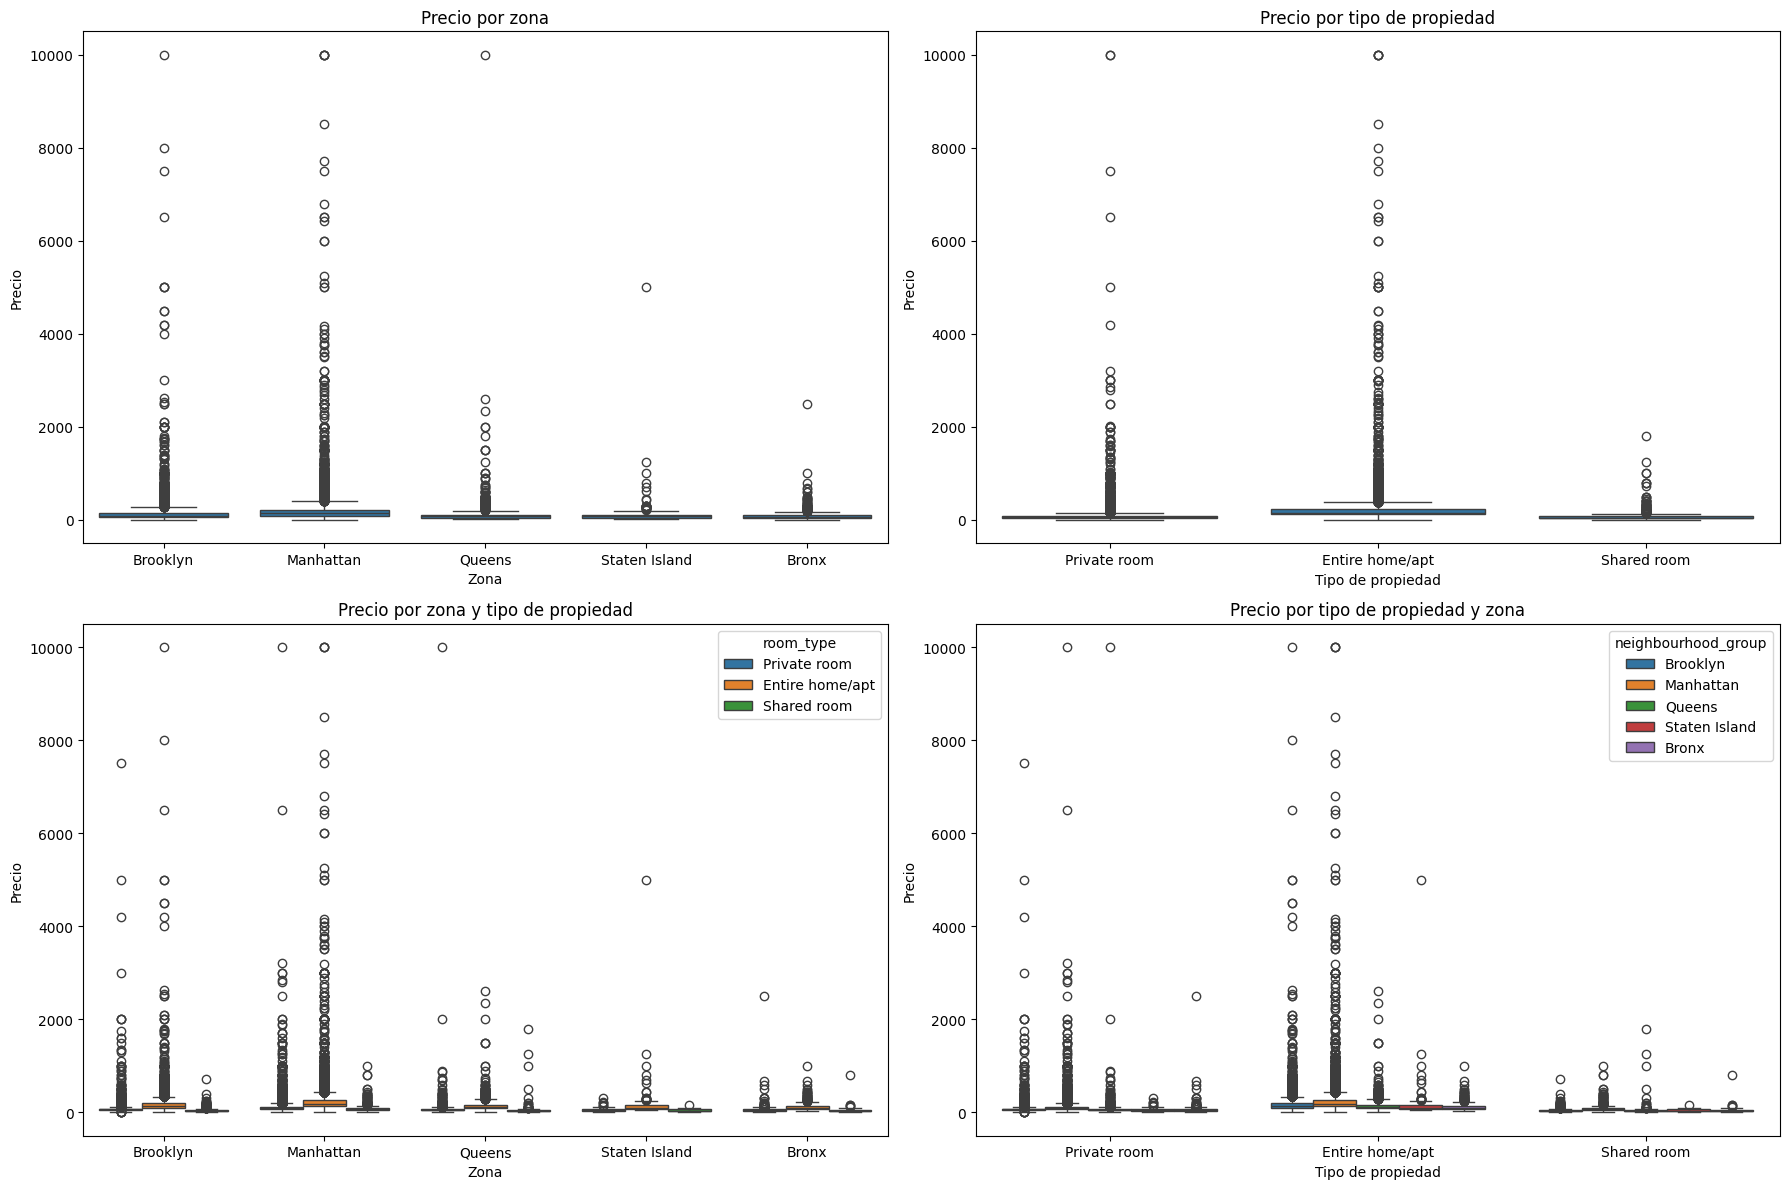

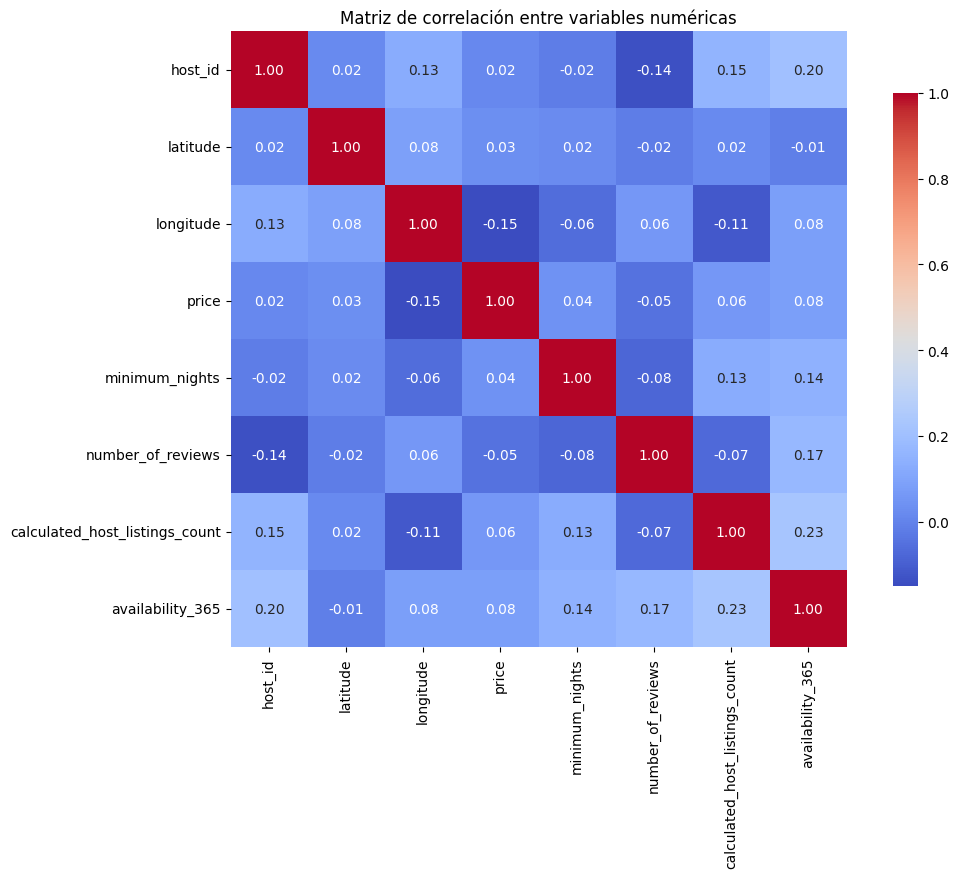

In [31]:
# Analizammos bivariados entre variables numéricas y categóricas
# Creamos un subplot con 2 filas y 2 columnas
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
plt.subplots_adjust(hspace=0.5, wspace=0.3)
# Boxplot: Precio por zona
sns.boxplot(data=total_data, x="neighbourhood_group", y="price", ax=axes[0, 0])
axes[0, 0].set_title("Precio por zona")
axes[0, 0].set_xlabel("Zona")
axes[0, 0].set_ylabel("Precio")
# Boxplot: Precio por tipo de propiedad
sns.boxplot(data=total_data, x="room_type", y="price", ax=axes[0, 1])
axes[0, 1].set_title("Precio por tipo de propiedad")
axes[0, 1].set_xlabel("Tipo de propiedad")
axes[0, 1].set_ylabel("Precio")
# Boxplot: Precio por zona y tipo de propiedad
sns.boxplot(data=total_data, x="neighbourhood_group", y="price", hue="room_type", ax=axes[1, 0])
axes[1, 0].set_title("Precio por zona y tipo de propiedad")
axes[1, 0].set_xlabel("Zona")
axes[1, 0].set_ylabel("Precio")
# Boxplot: Precio por tipo de propiedad y zona
sns.boxplot(data=total_data, x="room_type", y="price", hue="neighbourhood_group", ax=axes[1, 1])
axes[1, 1].set_title("Precio por tipo de propiedad y zona")
axes[1, 1].set_xlabel("Tipo de propiedad")
axes[1, 1].set_ylabel("Precio")
plt.tight_layout()
plt.show()

# Calculamos la matriz de correlación
correlation_matrix = total_data.select_dtypes(include='number').corr()
# Visualizamos la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

# Conclusion: 
- El análisis exploratorio de datos revela que los precios de los listados en Nueva York varían significativamente según la zona y el tipo de propiedad.
- Manhattan y Brooklyn tienen los precios más altos, mientras que Staten Island tiene los precios más bajos.
- Los apartamentos privados tienden a tener precios más altos que las habitaciones compartidas o los alojamientos enteros.
- La mayoría de los listados tienen un número moderado de reseñas, y la mayoría de los hosts tienen pocos listados.
- La mayoría de los listados requieren pocas noches mínimas y tienen una alta disponibilidad durante el año.
- El análisis de correlación muestra que hay una correlación positiva moderada entre el precio y el número de reseñas, así como entre el precio y la disponibilidad.

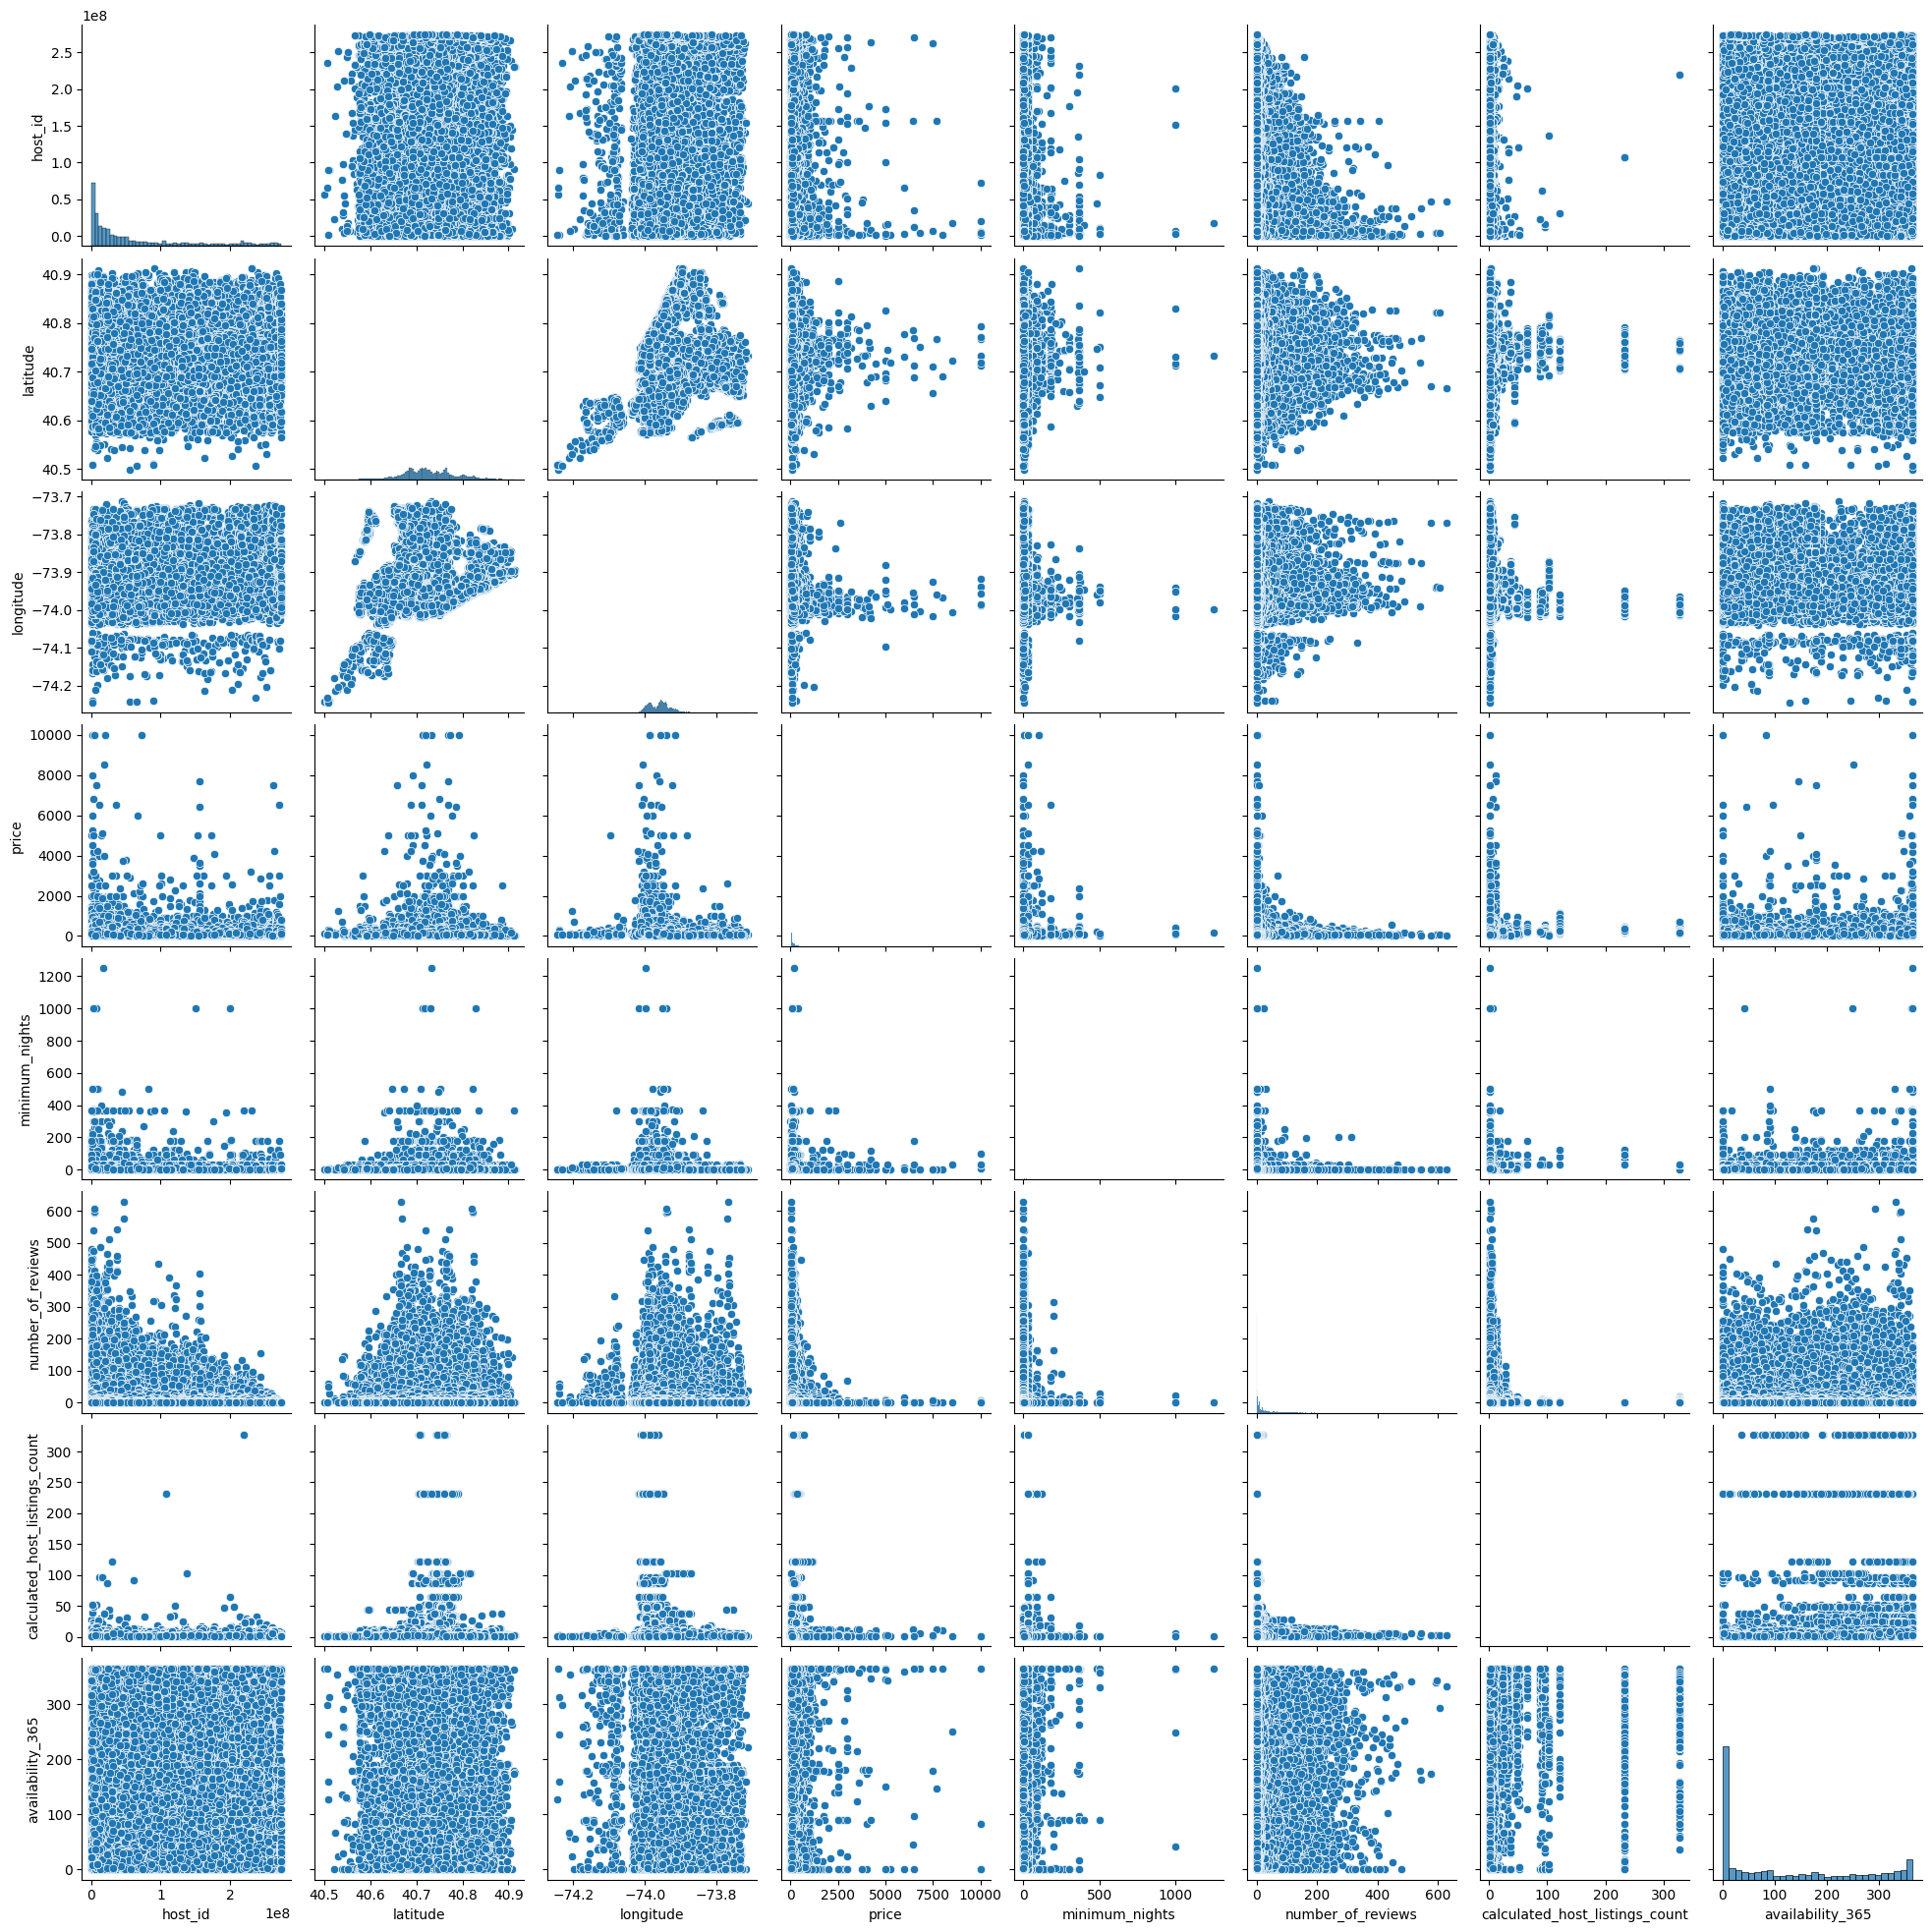

In [32]:
sns.pairplot(data=total_data)



## Paso 2

# Ingenieria de caracteristicas

# Analisis de outliers

In [33]:
total_data.describe(include='all')

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
unique,NaN,5,221,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,NaN,NaN
freq,NaN,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,NaN,NaN
mean,6.762001e+07,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,7.143982,112.781327
std,7.861097e+07,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.438000e+03,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,1.000000,0.000000
50%,3.079382e+07,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.074344e+08,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,2.000000,227.000000


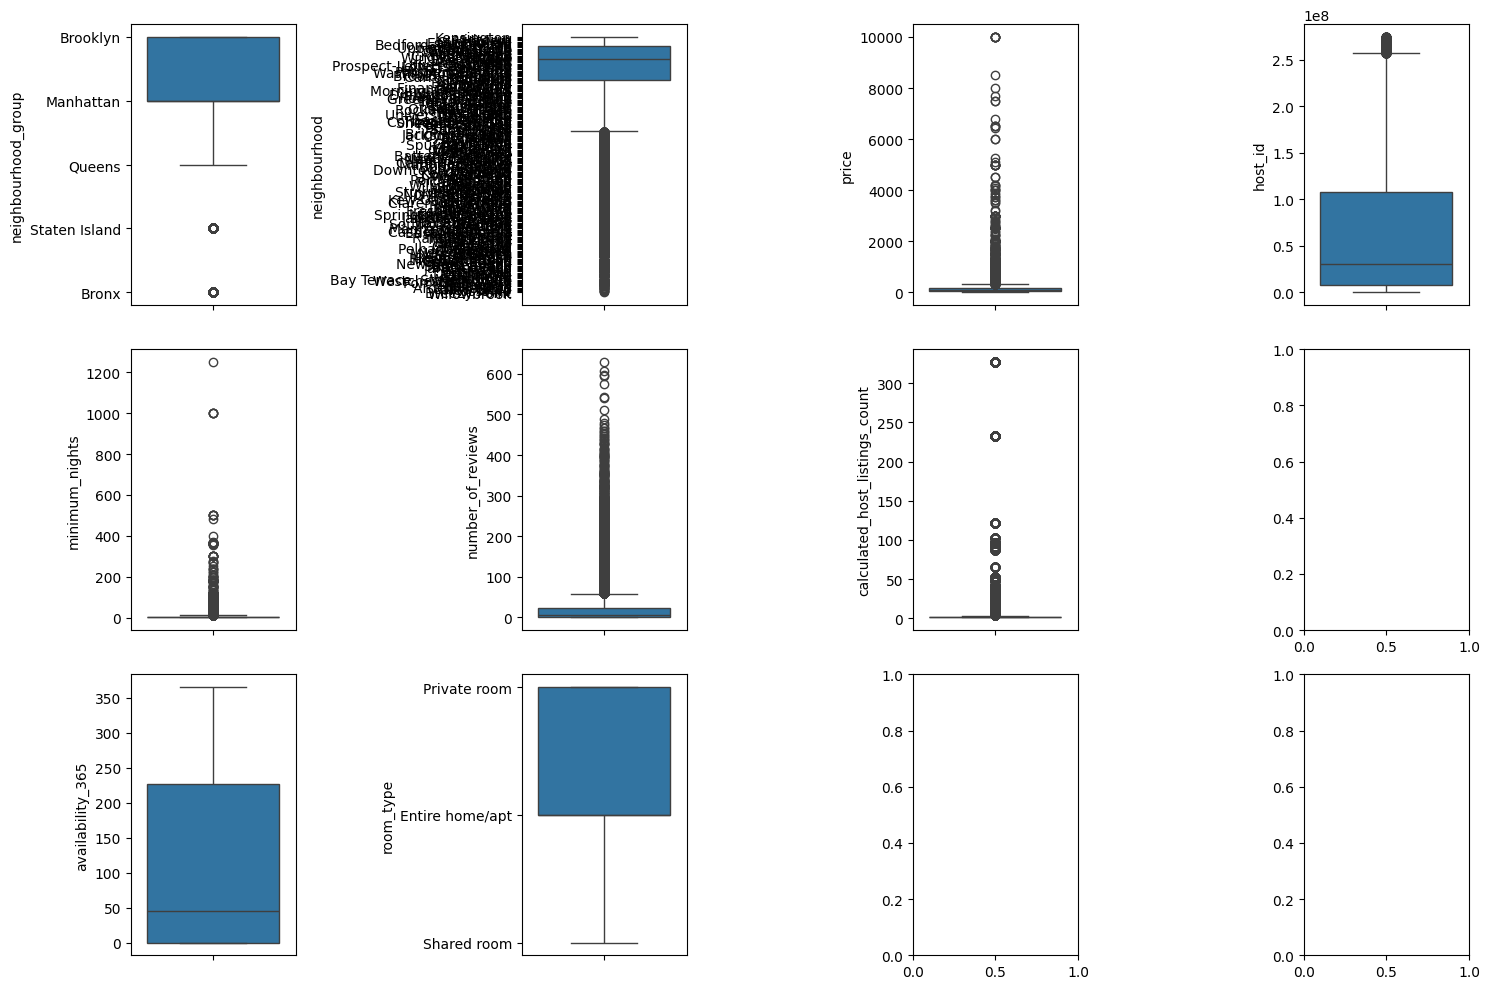

In [34]:
# Creamos subplots para detectar valores atípicos
fig, axis = plt.subplots(3, 4, figsize=(15, 10))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "neighbourhood_group")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "neighbourhood")
sns.boxplot(ax = axis[0, 2], data = total_data, y = "price")
sns.boxplot(ax = axis[1, 0], data = total_data, y = "minimum_nights")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "number_of_reviews")
sns.boxplot(ax = axis[1, 2], data = total_data, y = "calculated_host_listings_count")
sns.boxplot(ax = axis[2, 0], data = total_data, y = "availability_365")
sns.boxplot(ax = axis[2, 1], data = total_data, y = "room_type")
sns.boxplot(ax = axis[0, 3], data = total_data, y = "host_id")


plt.tight_layout()
plt.show()



# Buscamos los valores atipicos y nos encontramos que varias columnas tienen valores atipicos asique procedemos a nalizarlas.

- Valor atipico en ['price']

In [42]:

price_stats = total_data["price"].describe()

price_stats


count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [ ]:
iqr_price = price_stats["75%"] - price_stats["25%"]
upper_price = price_stats["75%"] + 1.5 * iqr_price
upper_price

np.float64(334.0)

In [46]:
total_data = total_data[(total_data["price"] > 0) & (total_data["price"] < upper_price)]
total_data


,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6,2


- Valor atipico en ['minimum_nights']

In [47]:
# Hacemos lo mismo para "minimum_nights"
minimum_nights_stats = total_data["minimum_nights"].describe()
minimum_nights_stats

count    45907.00000
mean         6.93587
std         19.85941
min          1.00000
25%          1.00000
50%          2.00000
75%          5.00000
max       1250.00000
Name: minimum_nights, dtype: float64

In [48]:
iqr_minimum_nights = minimum_nights_stats["75%"] - minimum_nights_stats["25%"]
upper_minimum_nights = minimum_nights_stats["75%"] + 1.5 * iqr_minimum_nights
upper_minimum_nights

np.float64(11.0)

In [51]:
total_data = total_data[total_data["minimum_nights"] <= upper_minimum_nights]
total_data

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
5,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,1,129
...,...,...,...,...,...,...,...,...,...,...,...
48888,274321313,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,1,31
48889,107716952,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,2,163
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36


- Valor atipico en ['number_of_reviews']

In [52]:
# buscamos los outliers de "number_of_reviews"
number_of_reviews_stats = total_data["number_of_reviews"].describe()
number_of_reviews_stats

count    37079.000000
mean        27.612988
std         48.646269
min          0.000000
25%          1.000000
50%          7.000000
75%         31.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [53]:
iqr_number_of_reviews = number_of_reviews_stats["75%"] - number_of_reviews_stats["25%"]
upper_number_of_reviews = number_of_reviews_stats["75%"] + 1.5 * iqr_number_of_reviews
upper_number_of_reviews

np.float64(76.0)

In [57]:
total_data = total_data[(total_data["number_of_reviews"]> 0) & (total_data["number_of_reviews"] < upper_number_of_reviews)]
total_data

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
5,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,1,129
10,7702,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,1,6
18,20950,Brooklyn,Crown Heights,40.67592,-73.94694,Entire home/apt,99,3,53,1,21
...,...,...,...,...,...,...,...,...,...,...,...
48782,83554966,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,1,147
48790,257683179,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,6,339
48799,211644523,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,1,87
48805,273841667,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,1,40


- Valor atipico en ['calculated_host_listings_count']

In [58]:
# Buscamos los outliers de "calculated_host_listings_count"
calculated_host_listings_count_stats = total_data["calculated_host_listings_count"].describe()
calculated_host_listings_count_stats

count    26946.000000
mean         3.605544
std         23.766679
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [59]:
iqr_calculated_host_listings_count = calculated_host_listings_count_stats["75%"] - calculated_host_listings_count_stats["25%"]
upper_calculated_host_listings_count = calculated_host_listings_count_stats["75%"] + 1.5 * iqr_calculated_host_listings_count
upper_calculated_host_listings_count

np.float64(3.5)

In [60]:
total_data = total_data[(total_data["calculated_host_listings_count"] > 0) & (total_data["calculated_host_listings_count"] < upper_calculated_host_listings_count)]
total_data

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
5,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,1,129
10,7702,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,1,6
18,20950,Brooklyn,Crown Heights,40.67592,-73.94694,Entire home/apt,99,3,53,1,21
20,21207,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48732,33917435,Manhattan,Lower East Side,40.71825,-73.99019,Entire home/apt,150,4,1,1,13
48782,83554966,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,1,147
48799,211644523,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,1,87
48805,273841667,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,1,40
